# Visit the Sage site for more info: https://sagecontinuum.org

In [124]:
# Install requirements
! pip install --no-cache-dir -r requirements.txt -q

In [125]:
# Avoid an issue with the default cache dir
! export MPLCONFIGDIR="./"

In [126]:
%matplotlib inline

In [127]:
import sage_data_client
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.width = 120

In [128]:
# Get the last N hours of temperature data
df = sage_data_client.query(
    start="-12h",
    filter={
        "name": "env.temperature",
        "sensor": "bme680",
        "zone": "shield",
    }
)

In [129]:
print(df)

                                timestamp             name  value                meta.host   meta.job  \
0     2024-08-29 11:46:14.708948563+00:00  env.temperature  22.34  0000d83add0dbcb6.ws-rpi  Pluginctl   
1     2024-08-29 11:46:44.725276703+00:00  env.temperature  22.34  0000d83add0dbcb6.ws-rpi  Pluginctl   
2     2024-08-29 11:47:14.744576618+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
3     2024-08-29 11:47:44.776730620+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
4     2024-08-29 11:48:14.809567504+00:00  env.temperature  22.35  0000d83add0dbcb6.ws-rpi  Pluginctl   
...                                   ...              ...    ...                      ...        ...   
51713 2024-08-29 23:44:04.825996733+00:00  env.temperature  23.78  0000e45f014524c6.ws-rpi  Pluginctl   
51714 2024-08-29 23:44:34.829301823+00:00  env.temperature  23.78  0000e45f014524c6.ws-rpi  Pluginctl   
51715 2024-08-29 23:45:04.859472691+00:00  env.temperat

W014
W019
W01A has suspicious data, skipping
W01B
W022
W023
W026
W028
W051
W058


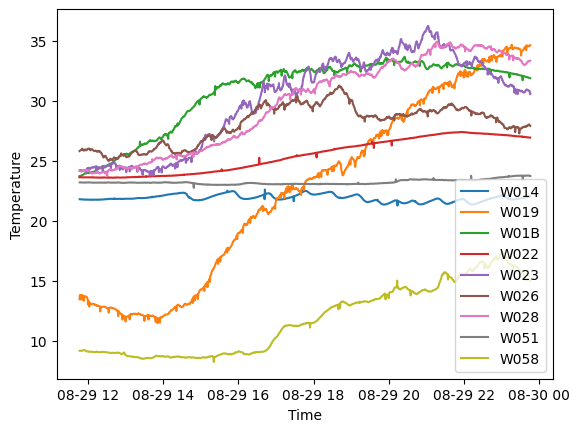

In [130]:
# Plot a few temperatures as time series
# Group by sensor (meta.vsn)
max_sensors = 10
fig, ax = plt.subplots()

for i, (vsn, group) in enumerate(df.groupby("meta.vsn")):

    if i >= max_sensors:
        break

    if group["value"].mean() < -100:
        print(f"{vsn} has suspicious data, skipping")
        continue

    print(vsn)
    ax.plot(group["timestamp"], group["value"], label=vsn)

leg = ax.legend()
xlabel = ax.set_xlabel("Time")
ylabel = ax.set_ylabel("Temperature")